# CARDIOVASCULAR DISEASE DETECTION

Aim of the problem is to detect the presence or absence of cardiovascular disease in person based on the given features.
Features available are:


- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Using SageMaker, we will perform the following:
- 1. Load the “cardio_train.csv” dataset 
- 2. Perform Exploratory Data Analysis
- 3. Create Training and Testing Datasets
- 4. Train an XG-Boost classifier model in local mode
- 5. Perform GridSearch to optimize model hyperparameters
- 6. Train an XG-Boost classifier model using Amazon SageMaker
- 7. Deploy trained model as an endpoint
- 8. Assess trained model performance
- 9. Delete the endpoint

Data Source:https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

# IMPORT LIBARIES AND DATASETS

In [90]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [91]:
# read the csv file 
cardio_df = pd.read_csv("cardio_train.csv", sep=";")

In [92]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# PERFORM EXPLORATORY DATA ANALYSIS

In [93]:
# Drop id
cardio_df = cardio_df.drop(columns = 'id')

In [94]:
# since the age is given in days, we convert it into years
cardio_df['age'] = cardio_df['age']/365

In [95]:
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [96]:
# checking the null values
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [97]:
# Checking the dataframe information
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [98]:
# Statistical summary of the dataframe
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


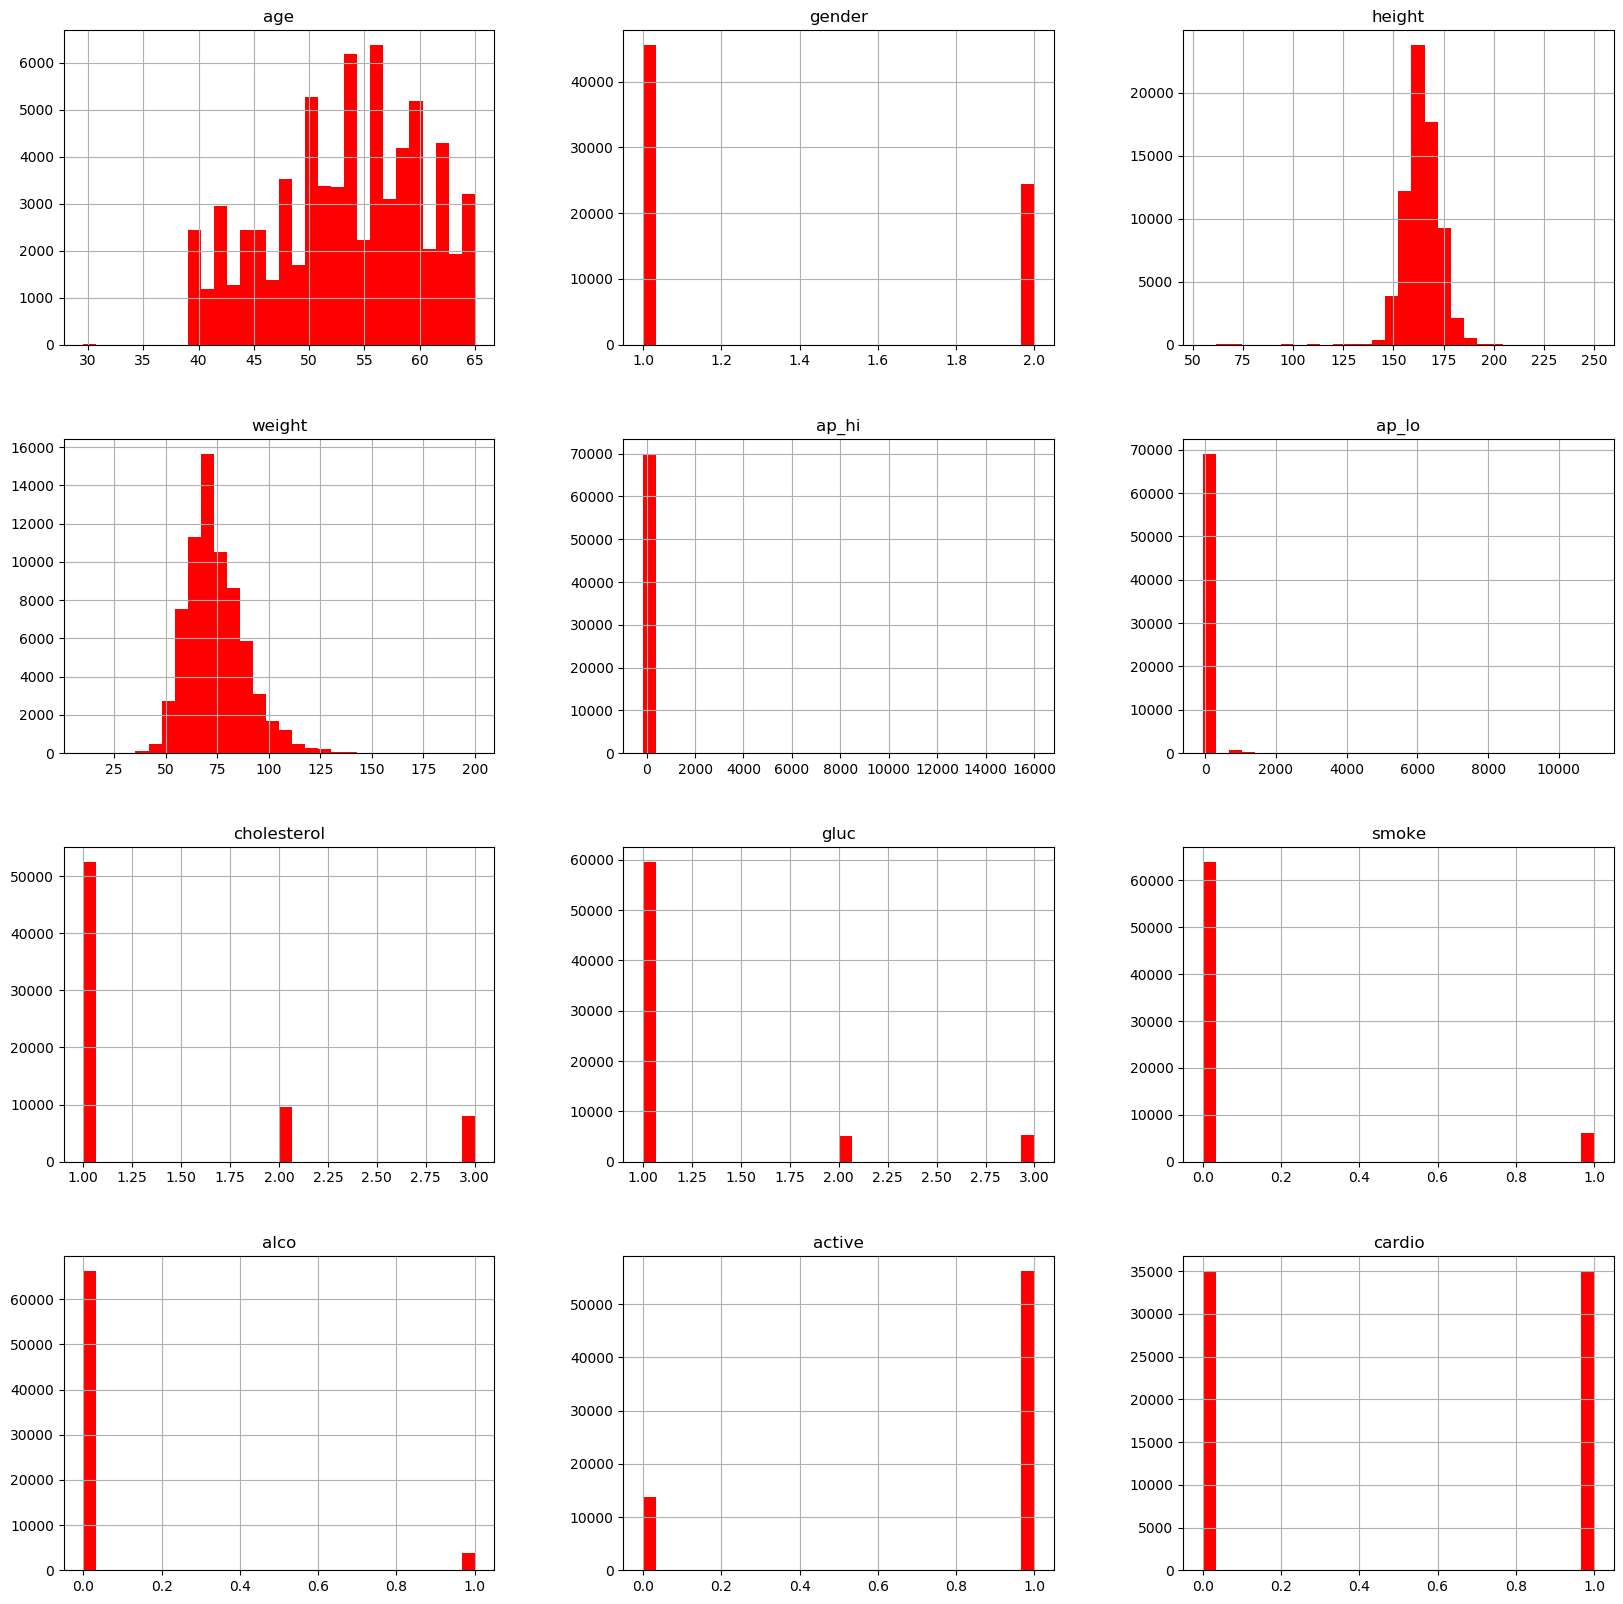

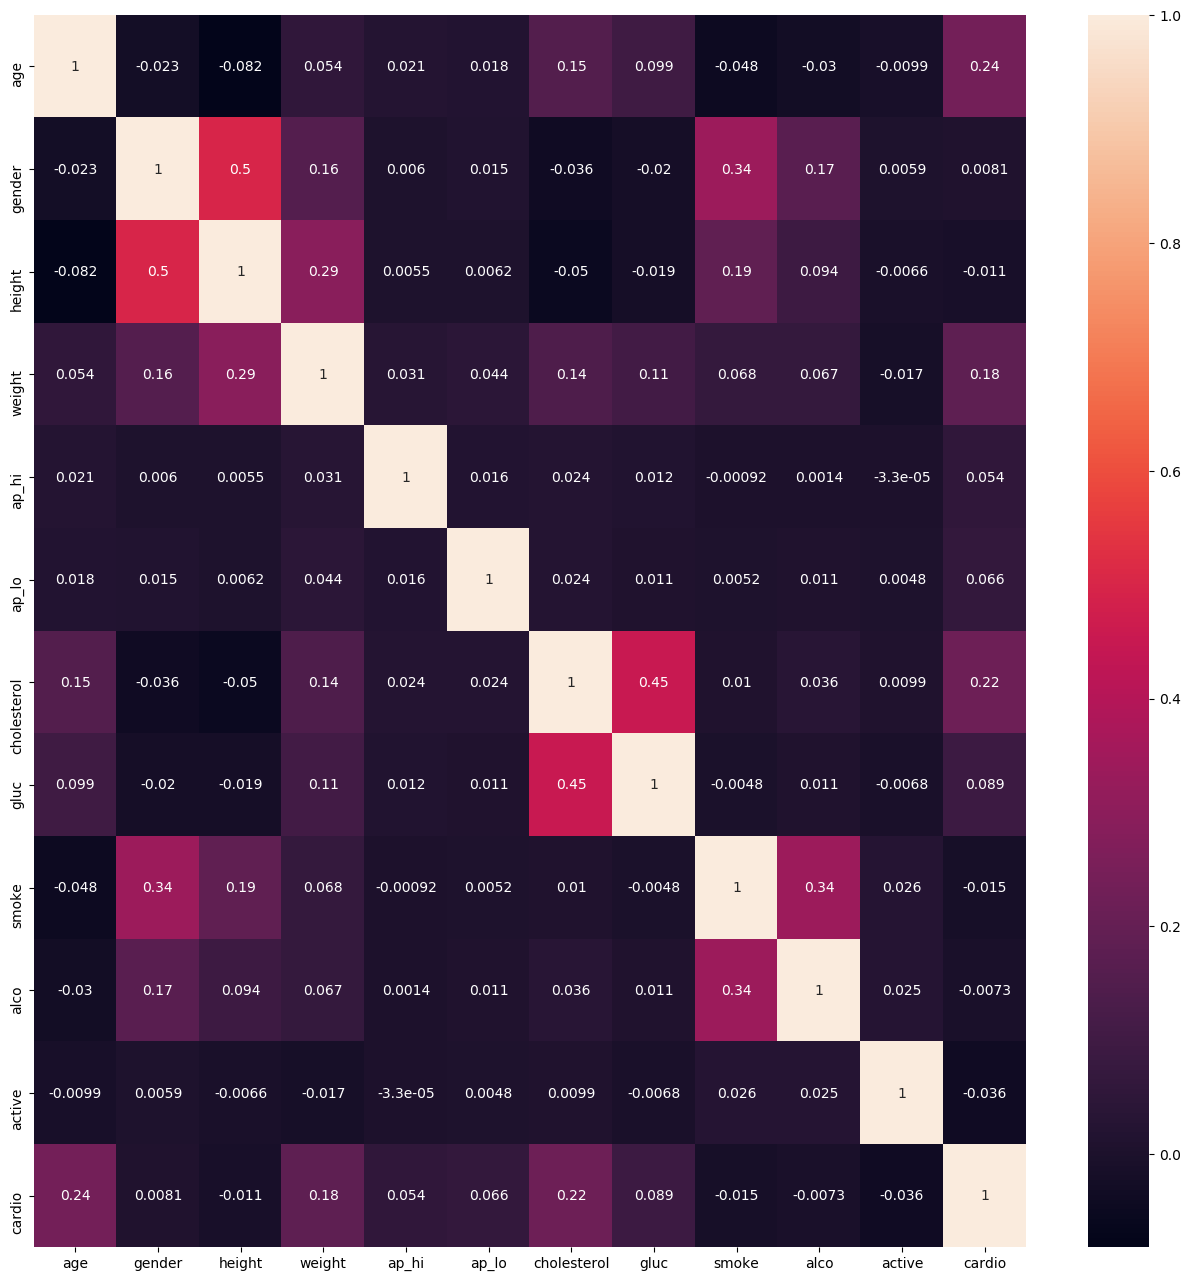

In [99]:
cardio_df.hist(bins = 30, figsize = (20,20), color = 'r')
# get the correlation matrix

corr_matrix = cardio_df.corr()
corr_matrix
# plotting the correlation matrix
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()


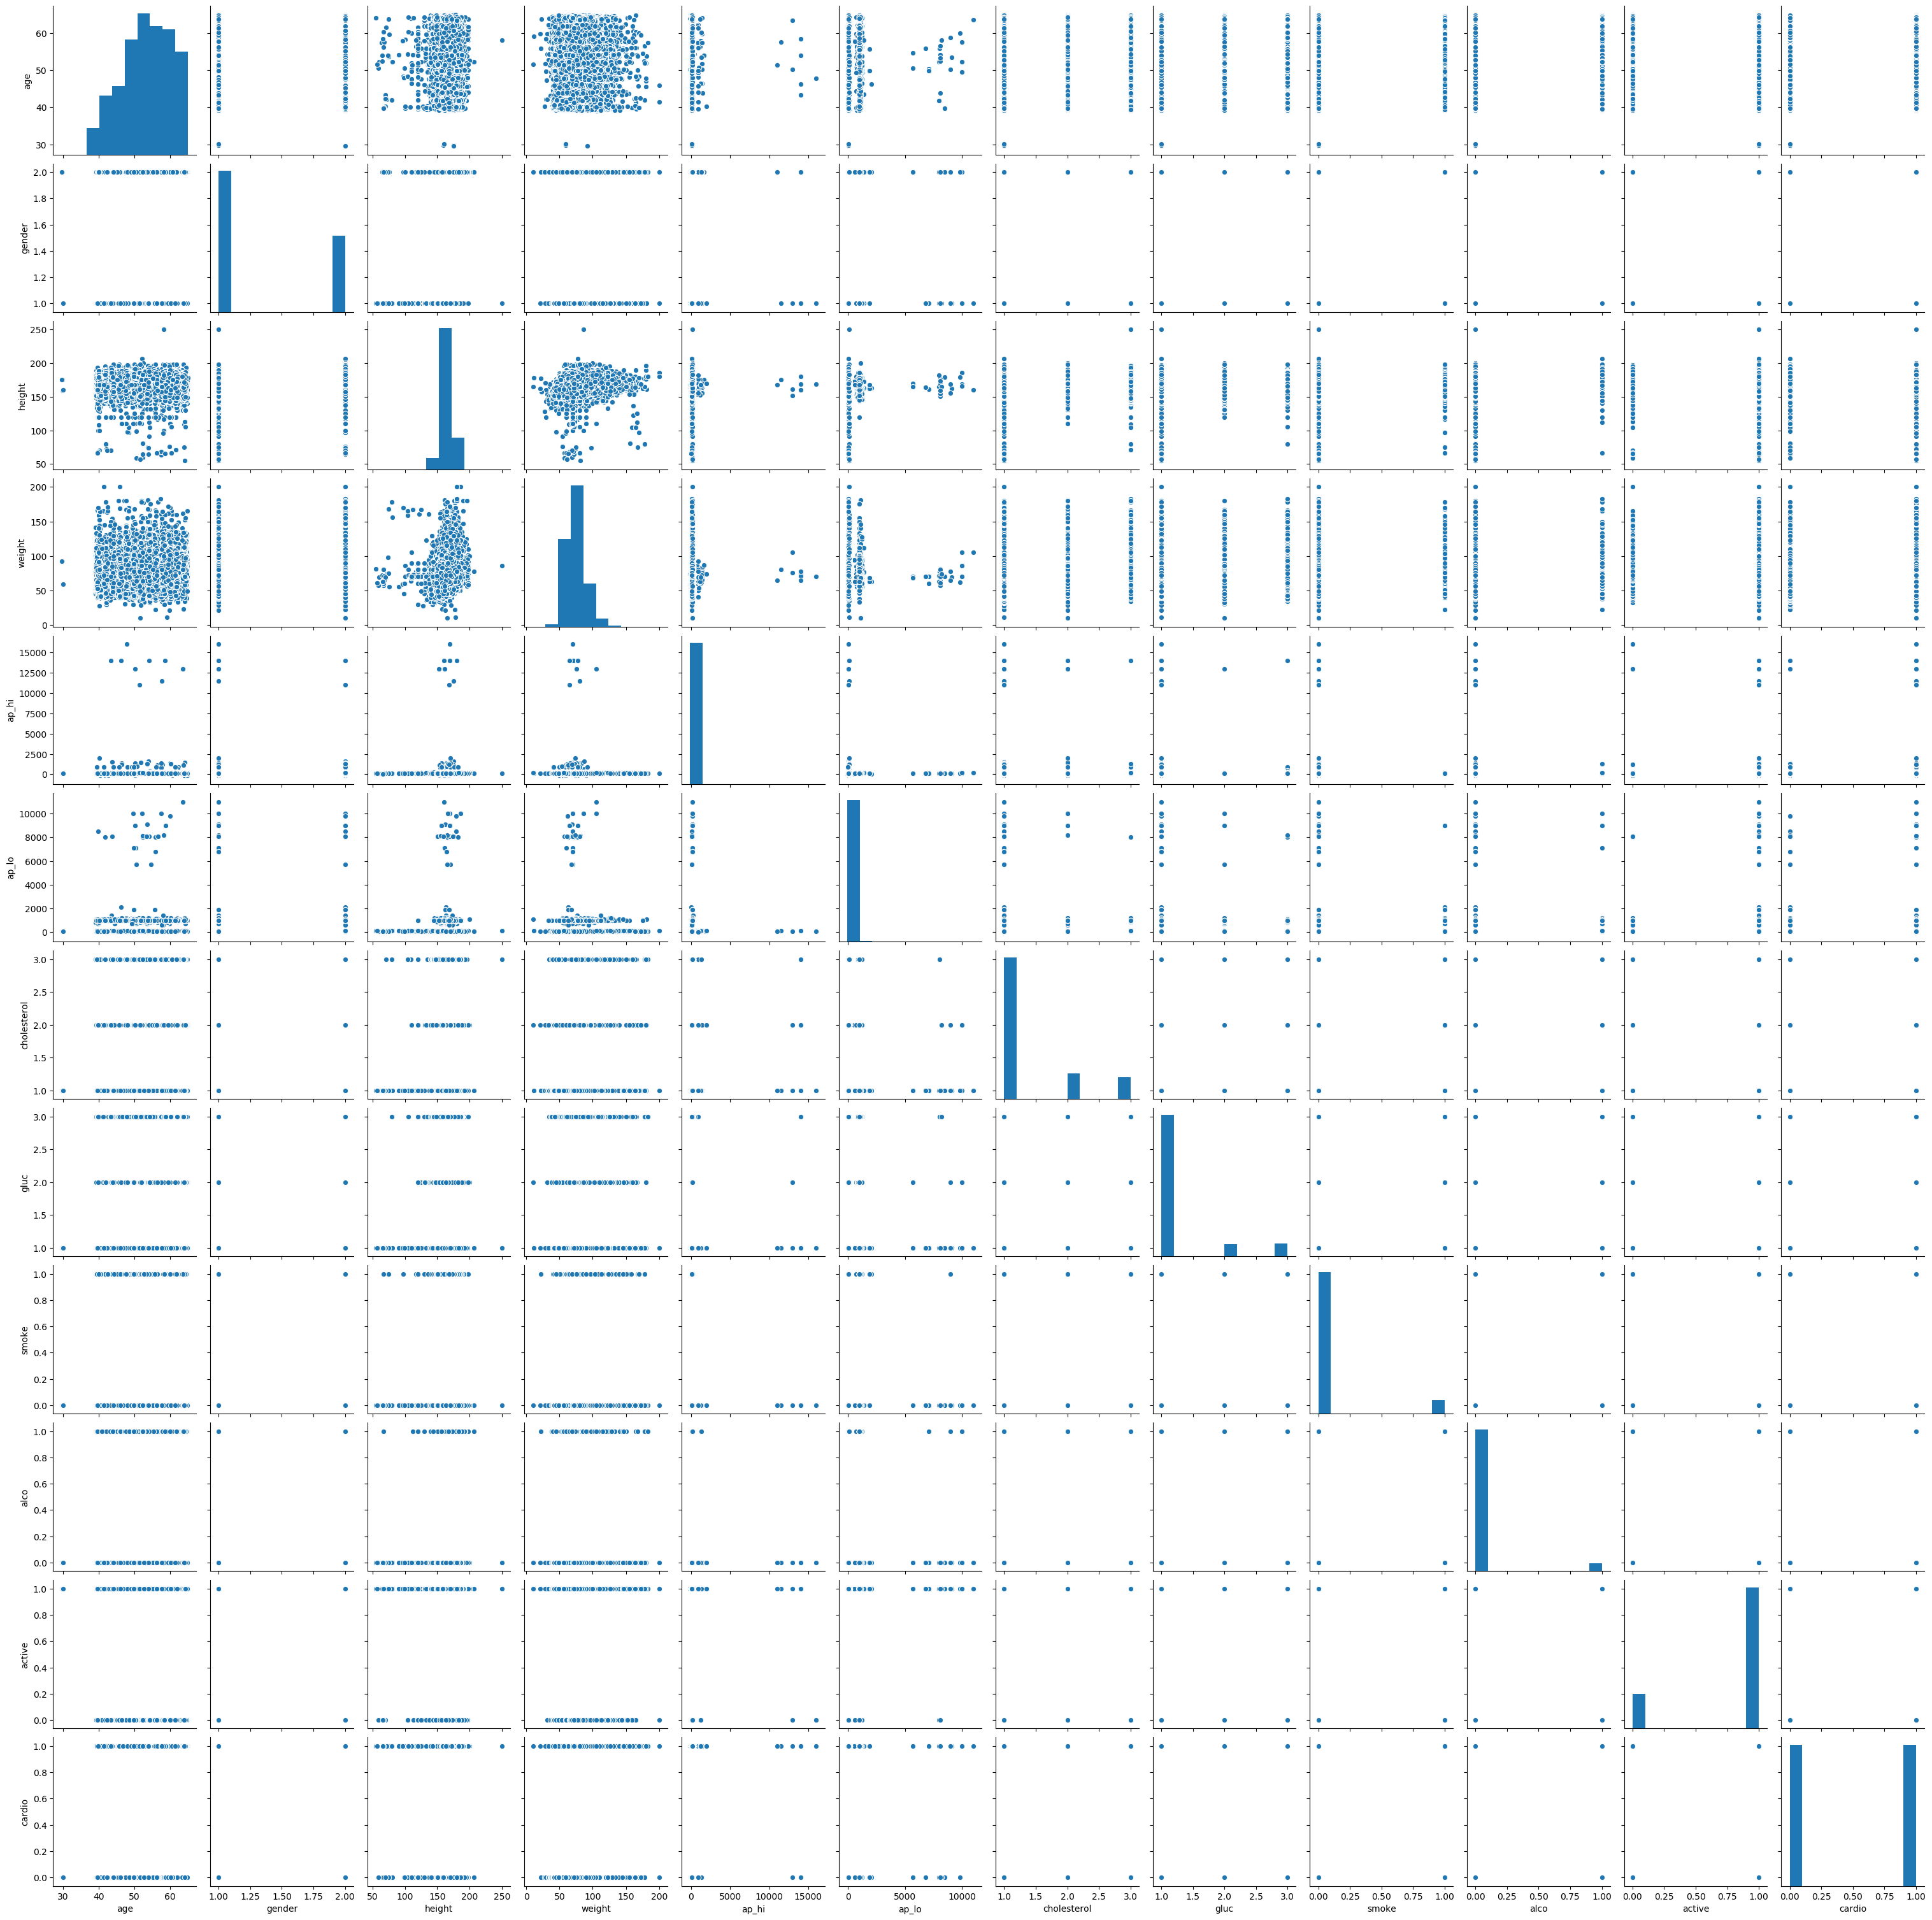

In [100]:
sns.pairplot(cardio_df)

# CREATE TRAINING AND TESTING DATASET

In [101]:
# split the dataframe into target and features
df_target = cardio_df['cardio']
df_final = cardio_df.drop(columns =['cardio'])

In [102]:
cardio_df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [103]:
df_final.shape

(70000, 11)

In [104]:
df_target.shape

(70000,)

In [105]:
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final, df_target, test_size = 0.2)



In [106]:
X_train.shape

(56000, 11)

In [107]:
y_train.shape

(56000,)

In [108]:
X_test.shape

(14000, 11)

In [109]:
y_test.shape

(14000,)

# TRAIN AND TEST XGBOOST MODEL IN LOCAL MODE (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [110]:
# install xgboost
!pip install xgboost

Keyring is skipped due to an exception: 'keyring.backends'


In [111]:
# use xgboost model in local mode

# note that we have not performed any normalization or scaling since XGBoost is not sensitive to this.
# XGboost is a type of ensemble algorithms and works by selecting thresholds or cut points on features to split a node. 
# It doesn't really matter if the features are scaled or not.


from xgboost import XGBClassifier

# model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
model = XGBClassifier(max_depth = 15)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [112]:
# make predictions on test data

predict = model.predict(X_test)

In [113]:
predict

array([0, 0, 0, ..., 1, 0, 0])

In [114]:
# print metrics for testing dataset
print("Precision = {}".format(precision_score(y_test, predict)))
print("Recall = {}".format(recall_score(y_test, predict)))
print("Accuracy = {}".format(accuracy_score(y_test, predict)))

Precision = 0.7216078900179319
Recall = 0.6927270119064697
Accuracy = 0.7139285714285715


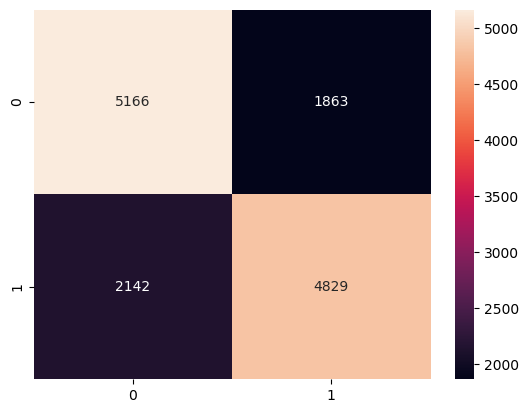

In [115]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
plt.figure()
sns.heatmap(cm, annot = True, fmt='2')

# PERFORM GRID SEARCH

In [116]:
param_grid = {
            'learning_rate': [0.01, 0.5, 1],   # regularization parameter 
            'max_depth': [3, 4, 5] # depth of each tree
             }

In [117]:
xgb_model = XGBClassifier(learning_rate = 0.01, objective='binary:logistic')
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb_model, param_grid, refit = True, verbose = 4)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] learning_rate=0.01, max_depth=3 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... learning_rate=0.01, max_depth=3, score=0.729, total=   2.0s
[CV] learning_rate=0.01, max_depth=3 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ..... learning_rate=0.01, max_depth=3, score=0.723, total=   1.8s
[CV] learning_rate=0.01, max_depth=3 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


[CV] ..... learning_rate=0.01, max_depth=3, score=0.728, total=   1.8s
[CV] learning_rate=0.01, max_depth=3 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.5s remaining:    0.0s


[CV] ..... learning_rate=0.01, max_depth=3, score=0.725, total=   2.3s
[CV] learning_rate=0.01, max_depth=3 .................................
[CV] ..... learning_rate=0.01, max_depth=3, score=0.713, total=   1.7s
[CV] learning_rate=0.01, max_depth=4 .................................
[CV] ..... learning_rate=0.01, max_depth=4, score=0.733, total=   2.3s
[CV] learning_rate=0.01, max_depth=4 .................................
[CV] ..... learning_rate=0.01, max_depth=4, score=0.728, total=   2.3s
[CV] learning_rate=0.01, max_depth=4 .................................
[CV] ..... learning_rate=0.01, max_depth=4, score=0.734, total=   2.3s
[CV] learning_rate=0.01, max_depth=4 .................................
[CV] ..... learning_rate=0.01, max_depth=4, score=0.734, total=   2.3s
[CV] learning_rate=0.01, max_depth=4 .................................
[CV] ..... learning_rate=0.01, max_depth=4, score=0.723, total=   2.3s
[CV] learning_rate=0.01, max_depth=5 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
 

In [118]:
y_predict_optim = grid.predict(X_test)

In [119]:
y_predict_optim

array([0, 0, 0, ..., 0, 0, 0])

In [120]:
# print metrics for testing dataset

print("Precision = {}".format(precision_score(y_test, y_predict_optim)))
print("Recall = {}".format(recall_score(y_test, y_predict_optim)))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict_optim)))

Precision = 0.755548657457706
Recall = 0.6983216181322622
Accuracy = 0.7372857142857143


# TRAIN AN XG-BOOST MODEL IN AWS SAGEMAKER

In [121]:
# split the dataframe into target and features
y = cardio_df['cardio']
X = cardio_df.drop(columns =['cardio'])

In [122]:
X = np.array(X)
y = np.array(y)

In [123]:
# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
y.shape

(70000, 1)

In [124]:
X.shape

(70000, 11)

In [125]:
y.shape

(70000, 1)

In [126]:
# spliting the data into training, testing and validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)


In [127]:
X_train.shape

(49000, 11)

In [128]:
y_train.shape

(49000, 1)

In [129]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [130]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,9,10
0,0,51.663014,1.0,156.0,59.0,110.0,70.0,2.0,1.0,0.0,0.0,1.0
1,0,53.868493,1.0,160.0,51.0,100.0,70.0,1.0,1.0,0.0,0.0,0.0
2,1,55.578082,1.0,153.0,98.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0
3,1,47.372603,1.0,167.0,63.0,140.0,80.0,1.0,1.0,0.0,0.0,1.0
4,1,43.589041,2.0,171.0,82.0,120.0,60.0,3.0,3.0,0.0,0.0,1.0


In [131]:
train_data.shape

(49000, 12)

In [132]:
val_data = pd.DataFrame({'Target':y_test[:,0]})
for i in range(X_test.shape[1]):
    val_data[i] = X_test[:,i]

In [133]:
val_data.head()

,Target,0,1,2,3,4,5,6,7,8,9,10
0,1,43.435616,1.0,162.0,78.0,140.0,89.0,2.0,1.0,0.0,0.0,0.0
1,0,44.515068,2.0,163.0,60.0,110.0,70.0,1.0,1.0,0.0,0.0,1.0
2,0,47.405479,1.0,160.0,57.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0
3,1,61.715068,1.0,158.0,73.0,130.0,80.0,3.0,3.0,0.0,0.0,1.0
4,0,54.241096,1.0,160.0,68.0,120.0,90.0,1.0,3.0,0.0,0.0,1.0


In [134]:
val_data.shape

(10500, 12)

In [135]:
# save train_data and validation_data as csv files.

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [136]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3

# Create a sagemaker session
sagemaker_session = sagemaker.Session()

#S 3 bucket and prefix that we want to use
# default_bucket - creates a Amazon S3 bucket to be used in this session
bucket = sagemaker_session.default_bucket()                    # Set a default S3 bucket
prefix = 'XGBoost-classifier'
key = 'XGBoost-classifier'
#Roles give learning and hosting access to the data
#This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

In [137]:
print(role)

arn:aws:iam::852800376493:role/service-role/AmazonSageMaker-ExecutionRole-20221006T193158


In [138]:
# read the data from csv file and then upload the data to s3 bucket
import os
with open('train.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-us-east-2-852800376493/XGBoost-classifier/train/XGBoost-classifier


In [139]:
# read the data from csv file and then upload the data to s3 bucket

with open('validation.csv','rb') as f:
    # The following code uploads the data into S3 bucket to be accessed later for training

    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
# Let's print out the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://sagemaker-us-east-2-852800376493/XGBoost-classifier/validation/XGBoost-classifier


In [140]:
# create output placeholder in S3 bucket to store the output
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker-us-east-2-852800376493/XGBoost-classifier/output


In [141]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session



# Note that this code leverages the new SageMaker SDK 2.0
# Check this for the list of changes from AWS SageMaker SDK 1.0 to 2.0: https://sagemaker.readthedocs.io/en/stable/v2.html

# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session


from sagemaker.amazon.amazon_estimator import get_image_uri

# container = sagemaker.image_uris.retrieve("xgboost", region = 'us-east-1')
container = sagemaker.image_uris.retrieve("xgboost", boto3.Session().region_name, version='1.0-1')

# container = get_image_uri(boto3.Session().region_name, 'xgboost','1.0-1') # Latest version of XGboost

In [142]:
# Specify the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

# Recall that XGBoost works by combining an ensemble of weak models to generate accurate/robust results. 
# The weak models are randomized to avoid overfitting

# num_round: The number of rounds to run the training.


# Alpha: L1 regularization term on weights. Increasing this value makes models more conservative.

# colsample_by_tree: fraction of features that will be used to train each tree.

# eta: Step size shrinkage used in updates to prevent overfitting. 
# After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.



Xgboost_classifier = sagemaker.estimator.Estimator(container,
                                                   role, 
                                                   instance_count = 1, 
                                                   instance_type = 'ml.m4.xlarge',
                                                   output_path = output_location,
                                                   sagemaker_session = sagemaker_session)

# To improve the performance of the model, a hyperparameters tuning job need to be run 

Xgboost_classifier.set_hyperparameters(max_depth = 3,
                                       objective = 'multi:softmax',
                                       num_class = 2,
                                       eta = 0.5,
                                       num_round = 150)


In [143]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.TrainingInput(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.TrainingInput(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')

data_channels = {'train': train_input,'validation': valid_input}


Xgboost_classifier.fit(data_channels)

2022-11-22 15:02:30 Starting - Starting the training job...ProfilerReport-1669129350: InProgress
...
2022-11-22 15:03:14 Starting - Preparing the instances for training............
2022-11-22 15:05:14 Downloading - Downloading input data...
2022-11-22 15:06:00 Training - Training image download completed. Training in progress....
2022-11-22 15:06:25 Uploading - Uploading generated training modelINFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[15:06:16] 49000x11 matrix with 539000 entries loaded from /opt/ml/input/data/train?f

# DEPLOY MODEL TO PERFORM INFERENCE

In [144]:
predictor = Xgboost_classifier.deploy(initial_instance_count = 1, instance_type = "ml.m4.xlarge")

-----!

In [145]:
predictor.endpoint_name

'sagemaker-xgboost-2022-11-22-15-09-32-973'

In [146]:
from sagemaker.predictor import csv_serializer, json_deserializer
predictor.serializer = csv_serializer

In [147]:
predictions = predictor.predict(X_test)
predictions

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


b'1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.

In [148]:
predicted_values = bytes_2_array(predictions)

In [149]:
predicted_values

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [150]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    #makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    #Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    #iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    #converting the list to into array
    l = np.array(l).astype('float32')
    
    #reshape one-dimensional array to two-dimentaional array
    return l.reshape(-1,1)

In [151]:
# plot metrics

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_test, predicted_values, average='macro')))
print("Recall = {}".format(recall_score(y_test, predicted_values, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, predicted_values)))

Precision = 0.7351801382985304
Recall = 0.7341364698567456
Accuracy = 0.7338095238095238


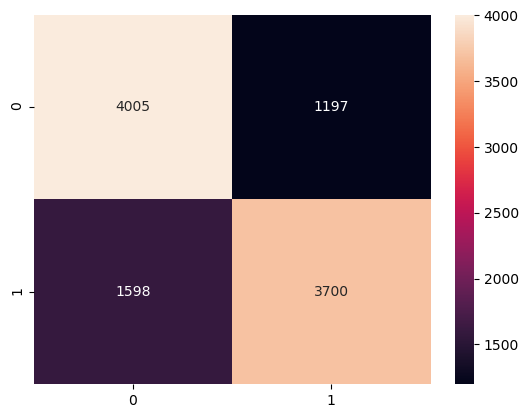

In [152]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_values)
plt.figure()
sns.heatmap(cm, annot=True, fmt = 'd')

In [153]:
# Delete the end-point
predictor.delete_endpoint()